# Linear Regression Implementation

In [55]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [56]:
points = pd.read_csv("data.csv")

In [57]:
points.head()

,Hours of learning,Scores
0,32.502345,31.707006
1,53.426804,68.777596
2,61.530358,62.562382
3,47.475640,71.546632
4,59.813208,87.230925


In [58]:
# Extract columns
x = points["Hours of learning"]
y = points["Scores"]


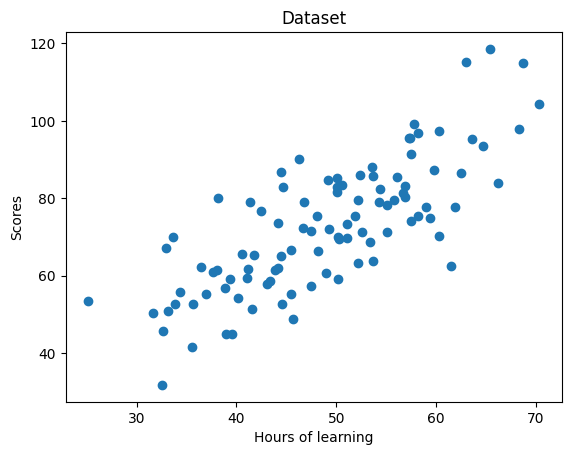

In [59]:
plt.scatter(x, y)
plt.title("Dataset")
plt.xlabel(x.name)
plt.ylabel(y.name)
plt.show()

In [60]:
# Hyper parameters
# y = m * x + b

learning_rate = 0.00001
initial_m = 0
initial_b = 0
num_iterations = 500

In [61]:
def compute_cost(points, m, b):
    total_cost = 0
    N = float(len(points))

    # Compute sum of squared errors
    for i in range(0, len(points)):
        x = points.iat[i, 0]
        y = points.iat[i, 1]
        total_cost += (y - (m * x + b)) ** 2

    # Return average of squared error
    return total_cost / N

In [62]:
# Equation: (y - (m * x + b)) ** 2

def step_gradient(points, current_m, current_b, learning_rate):
    gradient_m = 0
    gradient_b = 0
    N = float(len(points))

    # Calculate the gradient
    for i in range(len(points)):
        x = points.iat[i, 0]
        y = points.iat[i, 1]
        gradient_m += - (2/N) * x * (y - (current_m * x + current_b))
        gradient_b += - (2/N) * (y - (current_m * x + current_b))

    updated_m = current_m - learning_rate * gradient_m
    updated_b = current_b - learning_rate * gradient_b

    return updated_m, updated_b

In [63]:
def gradient_descent_runner(points, starting_m, starting_b, learning_rate, num_iterations):
    m = starting_m
    b = starting_b
    cost_graph = []

    for i in range(num_iterations):
        cost_graph.append(compute_cost(points, m, b))
        m, b = step_gradient(points, m, b, learning_rate)

    return [m, b, cost_graph]

In [64]:
m, b, cost_graph = gradient_descent_runner(points, initial_m, initial_b, learning_rate, num_iterations)

In [65]:
#Print optimized parameters
print ('Optimized b:', b)
print ('Optimized m:', m)

#Print error with optimized parameters
print ('Minimized cost:', compute_cost(points, m, b))

Optimized b: 0.03207191059727406
Optimized m: 1.478861741748324
Minimized cost: 112.64886100061


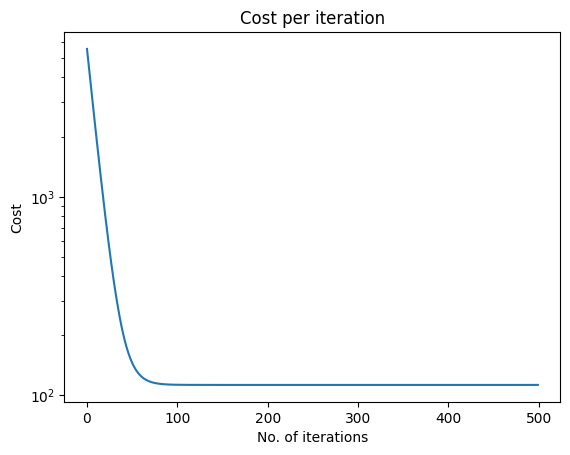

In [66]:
plt.plot(cost_graph)
plt.yscale("log")
plt.xlabel('No. of iterations')
plt.ylabel('Cost')
plt.title('Cost per iteration')
plt.show()

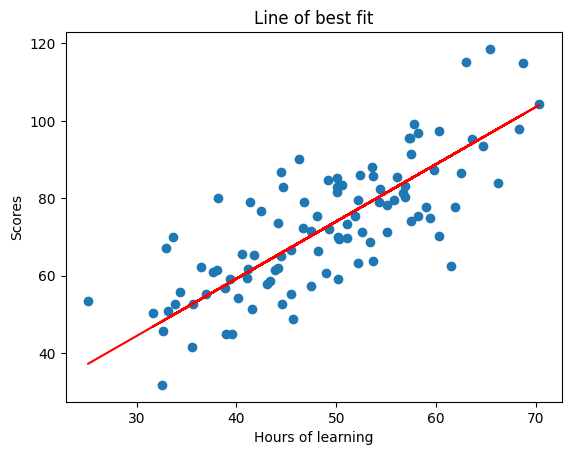

In [67]:
#Plot dataset
plt.scatter(x, y)
#Predict y values
pred = m * x + b
#Plot predictions as line of best fit
plt.plot(x, pred, c='r')
plt.xlabel(x.name)
plt.ylabel(y.name)
plt.title('Line of best fit')
plt.show()